# youtube playlist for pyspark, spark, Hadoop:
- https://www.youtube.com/@TRRaveendra/playlists
- https://www.youtube.com/watch?v=tYBUf81w-dE&list=PL50mYnndduIG8bRY2Imv4f1mQJg25EBpr

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [3]:
spark = SparkSession.builder.appName("Pyspark_May2023_BlogNotes").getOrCreate()

In [20]:
df = spark.read.csv("Student_Placement_Table.csv", header=True)

********************************************************************
####  PySpark Blog: May2023:
********************************************************************
####  JOB, STAGE, TASK:
    Job is divided into Stages and stages divided into tasks. 
   
********************************************************************
####  Driver Node, Worker Node:
    - Driver node: Will divide the job into stages and tasks(Partitions).
    - Every taks will be assigned to worker nodes.
    - Worker Node: will be having VCPU(Virtual CPU's) or avaialble slots to allocate the tasks.
********************************************************************
####  Steps happened once submit the spark application:
1). Once we submit spark application then below 2 progrms will be created in any resource management(YARN or any other).
	- Driver (Master) program
	- Executor (Slave) program

             -----------|-----------------|-----------------|------
                        |MASTER           | SLAVE           | PORT|
             -----------|-----------------|-----------------|------
                    YARN|RESOURCE MANAGER |NODE MANAGER     |8088 |
              STANDALONE|SPARK MASTER     |SPARK WORKER     |7077 |
       SPARK APPLICATION|DRIVER PROGRAM   |EXECUTOR PROGRAM |     |

             -----------|-----------------|-----------------|-----|

2). Based on transformation, it will decide how many partitions required for the given requirement.
    - No..of partitions = Total dataset size(Ex: 256MB)/ each partition size(128MB)
    - 2 partitions or 2 tasks
    
    
3). Now in each node there will be node manager who assigns the below resources for execution.
    - Memory (executor memory for each task)
    - Process (no..of cores)


4). Now Driver program will give the actual logic or transformation logic to Executors to perform the actual work 

5). Executor program will do the actual execution. Below are the responsibilities of Executors:
    - Memory or data will be taken from HDFS or any storage.
    - Process(Cores) will be provided by Node manager to executor.
    - Actual logic will be provided by Driver program to executor


6). here the process of execution of partition with logic in executor is called a TASK.
    - If there is partition+Logic and not running currently then it is not task. Only running state executions called as task.

7). (Executors is a program) vs (Partitions is data) vs (Task is a state of execution):

    - No..of Executors = No..of Partitions =  No..of Tasks
     (Program)


*). at the end Driver program will collect the outputs from each exeutor and gives the final output to spark application output.





********************************************************************
##### Only Definations with above explanation: 
STAGE: Execution of sequenctial narrow transformations
NEW STAGE: Will get created with wide(shuffle) transformations

DRIVER: Will maintaines state of executors.
EXECUTOR: Program which performs the partitinings
No..of EXECUTORS: will equal to No..of partitions

TASK: is a partition which are executing.
No..of TASKS: will equal to No..of executors.



********************************************************************




********************************************************************
##### Node, Cluester:
    - Node is single machine or server
    - Cluester is collection of nodes or servers.

********************************************************************
##### JOB, STAGE, TASK: 
*). TASK: 
	- Each partition is called as TASK.
	- let say we have a list with 256MB size then 2 partitions with 128MB size will crated. 
	- So in this program 2 tasks has been created.
	
*). STAGE:
	- Stage is nothing but collection of tasks.
	- Lets say we have 10 pyspark commands(transformations) done on dataframe. 
	- 1 to 4 narrow transformations, 4 to 5 wide transformation, 5 to 7 again narrow transformations,       7 to 8 wide T, 8 to 10   narrow transformations are there:
      then 1-4 will be stage-1, 4-7 will be stage-2, 7-10 will be stage-3. So totally 3 stages               created.
      
*). JOB: 
    - Collection of stages called Job. It is nothing but reading files or writing files, etc.
********************************************************************

### No..of executors or partitions or tasks with Narrow & Wide transformations

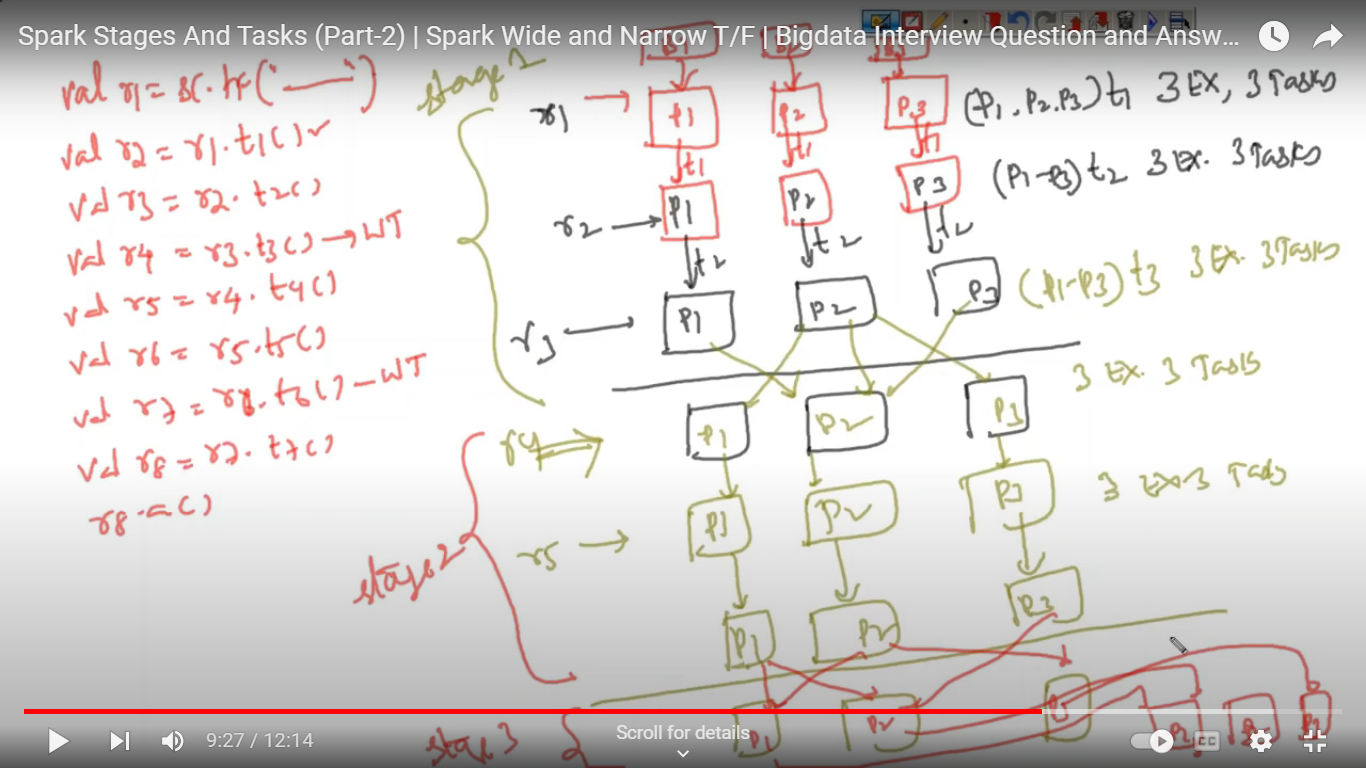

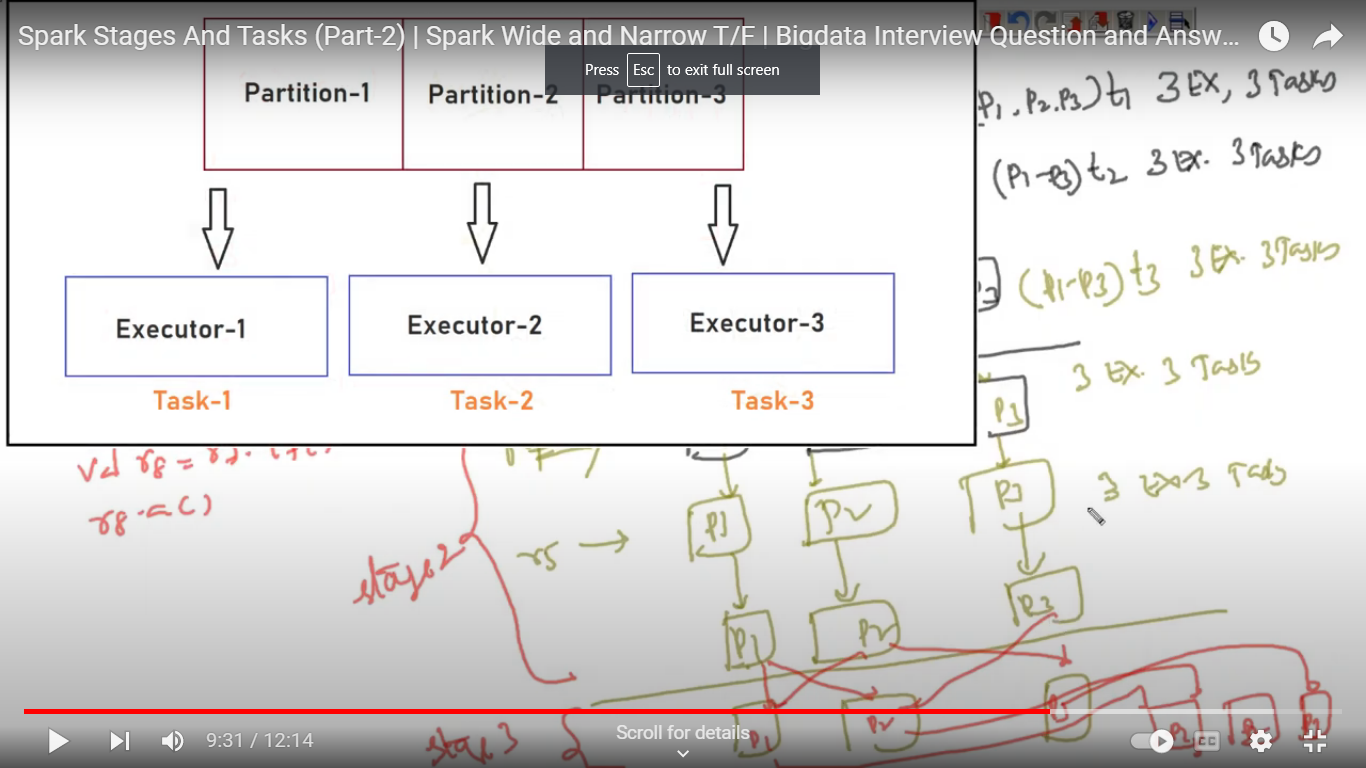

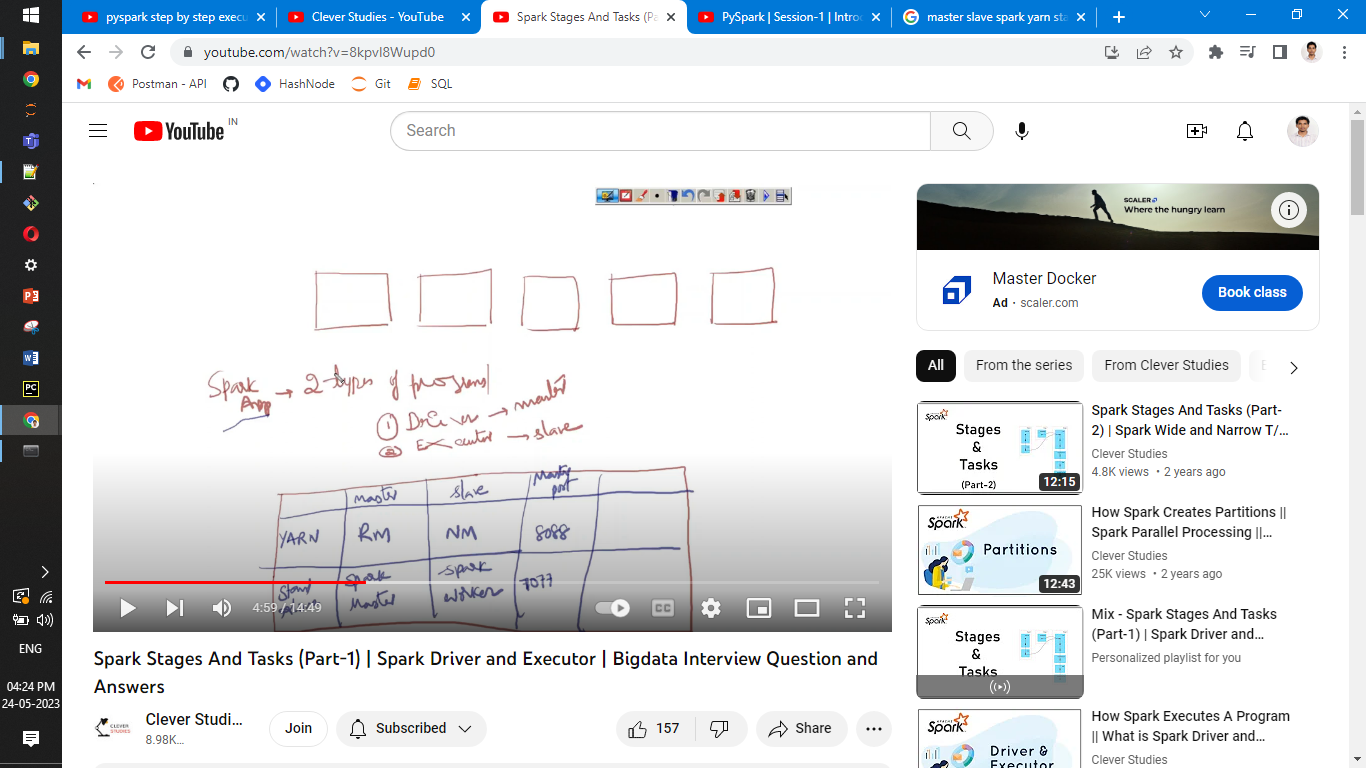


## Team Lead example: Lets say 8 assosiates are in team and 5 tasks are there to assign. Now team lead will assign each of 5 task to 5 associates. Now 3 associates are free(which means 3 of them are ready to work but no work has been assign.)

## Here team lead=Driver program, each associate =executor programs, each task = each taks to be executed in worker node.

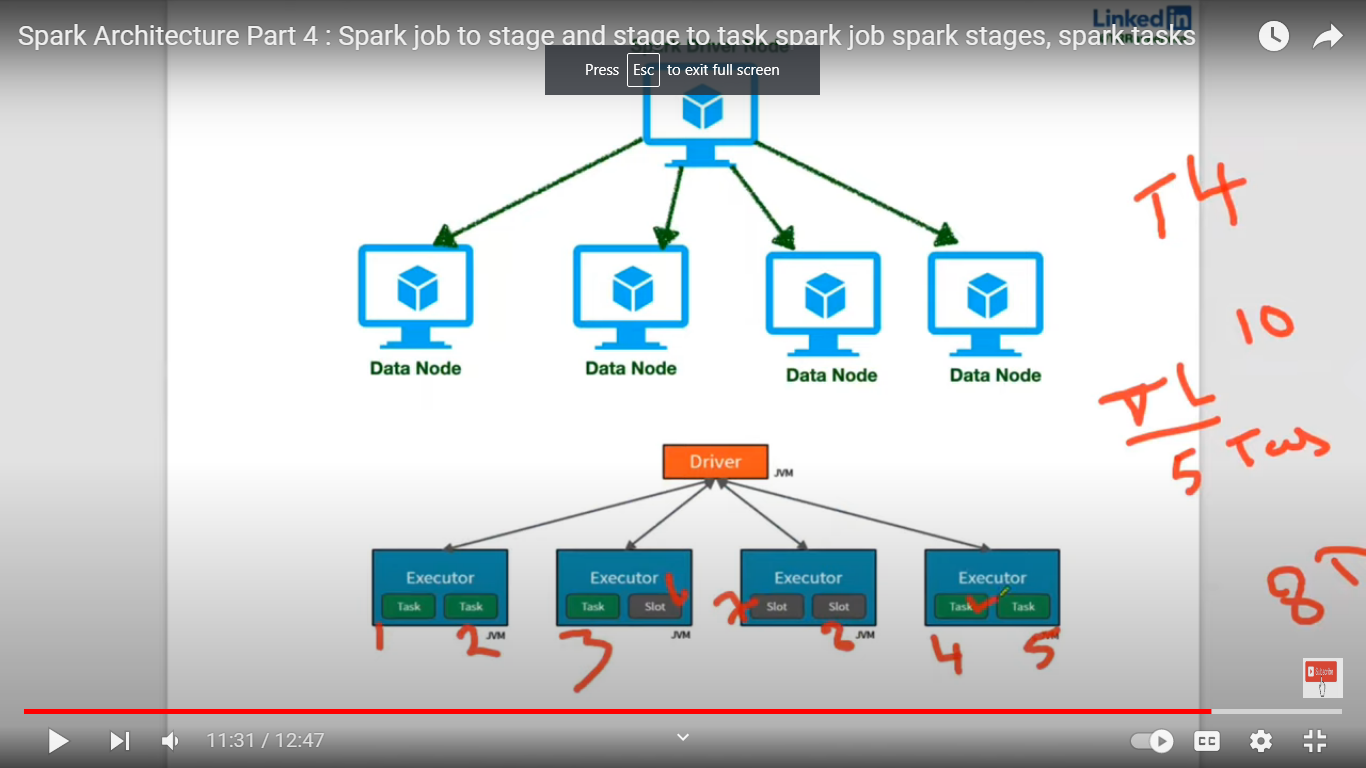

In [17]:
df.filter(col("Gender")=="M").explain()

== Physical Plan ==
*(1) Project [ID#103, Name#104, Gender#105, DOB#106, Location#107, University#108, Salary#109, Company#110, Email#111]
+- *(1) Filter (isnotnull(Gender#105) && (Gender#105 = M))
   +- *(1) FileScan csv [ID#103,Name#104,Gender#105,DOB#106,Location#107,University#108,Salary#109,Company#110,Email#111] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/R101100/Desktop/Git_Practice/0.Pyspark_May2023/Student_Placement..., PartitionFilters: [], PushedFilters: [IsNotNull(Gender), EqualTo(Gender,M)], ReadSchema: struct<ID:string,Name:string,Gender:string,DOB:string,Location:string,University:string,Salary:st...


## glom() function to get no..of partitions of rdd

In [27]:
#By default parallelize() function creates 4 partitions. 
#If we want we can change this by passing as arguments. 
#By using glom() function, we will get the list of partitions applied on rdd.

s1_rdd = spark.sparkContext.parallelize(range(20))
s1_rdd.glom().collect()

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]]

In [28]:
#manually giving no..of partitions from default(4) to 6 partitions
#collect to display the output data.


s1_rdd = spark.sparkContext.parallelize(range(10), 6)
s1_rdd.glom().collect()

[[0], [1, 2], [3, 4], [5], [6, 7], [8, 9]]

In [3]:
#manually giving no..of partitions from default(4) to 6 partitions
#Way-2 to get no.oof partiions using getNumPartitions() function


s1_rdd = spark.sparkContext.parallelize(range(10), 6)
#s1_rdd.glom().collect() -- one way to get no..of partitions.

s1_rdd.getNumPartitions()

6

In [36]:
# Use glom to assign manually the tasks and get the count of no..of partitions.
# count used to check no..of partitions used.


s1_rdd = spark.sparkContext.parallelize(range(10), 6)
s1_rdd.glom().count()

6

In [6]:
# Check the default partitions using defaultParallelism attribute.

sc.defaultParallelism

4

In [34]:
df.repartition(2)

DataFrame[ID: string, Name: string, Gender: string, DOB: string, Location: string, University: string, Salary: string, Company: string, Email: string]

# Spark Core Notes: 30May2023

### Scaling:
### Vertical scaling: Is old and very less used now. If you want to increase the size then within same system we are doing from 16GB to 32GB to 64GB etc.

### Horizontal scalling: Is used everywhere in cloud and many organizations. ITs like having similar systems in horizontal. If need to increase then adding or clubbing another system will works. 
##### Lets say booking a cab for 4 people 1 cab required. For 8 people adding 1 more cab, for 12 people giving 3 cabs will suffies. 

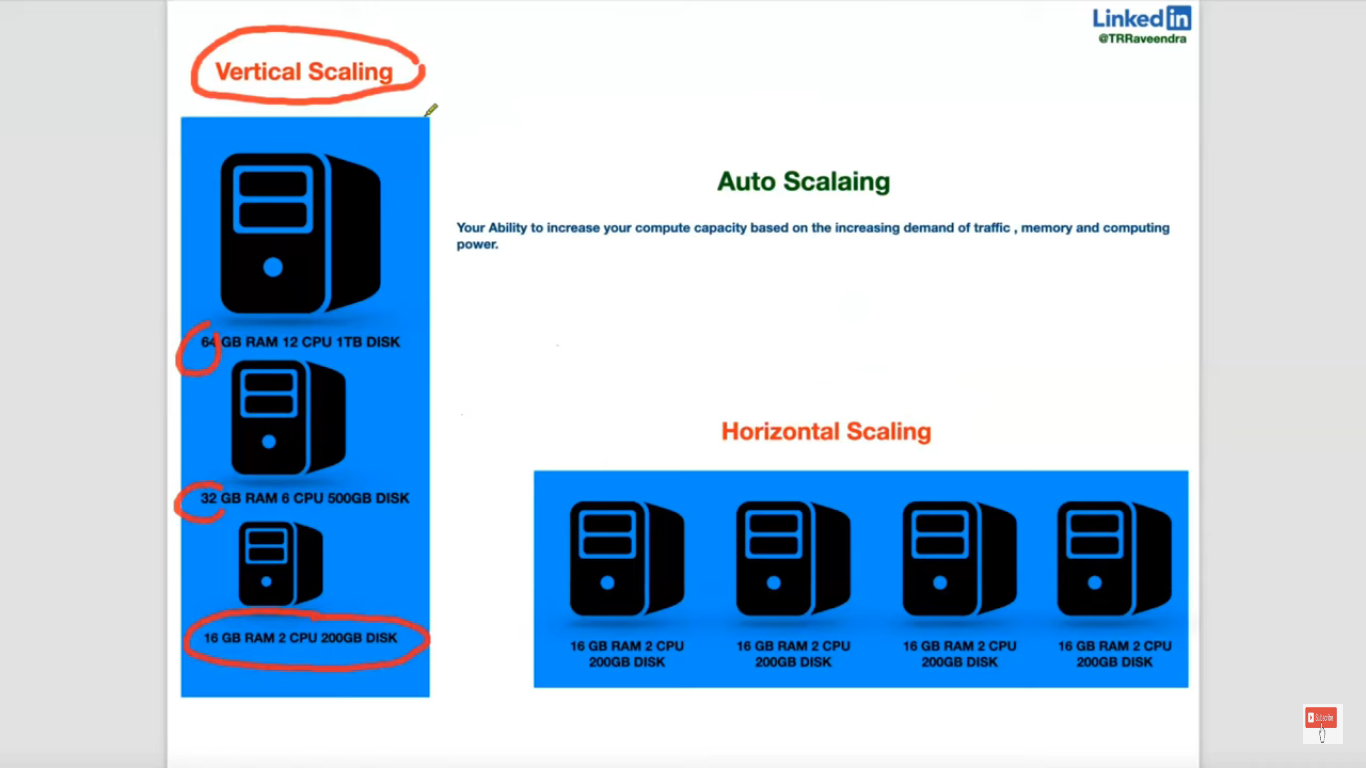

### CPU -> CORES -> Threads 
### CPU is like processor having no..of cores in it. Each core is having threads(Individual performer).

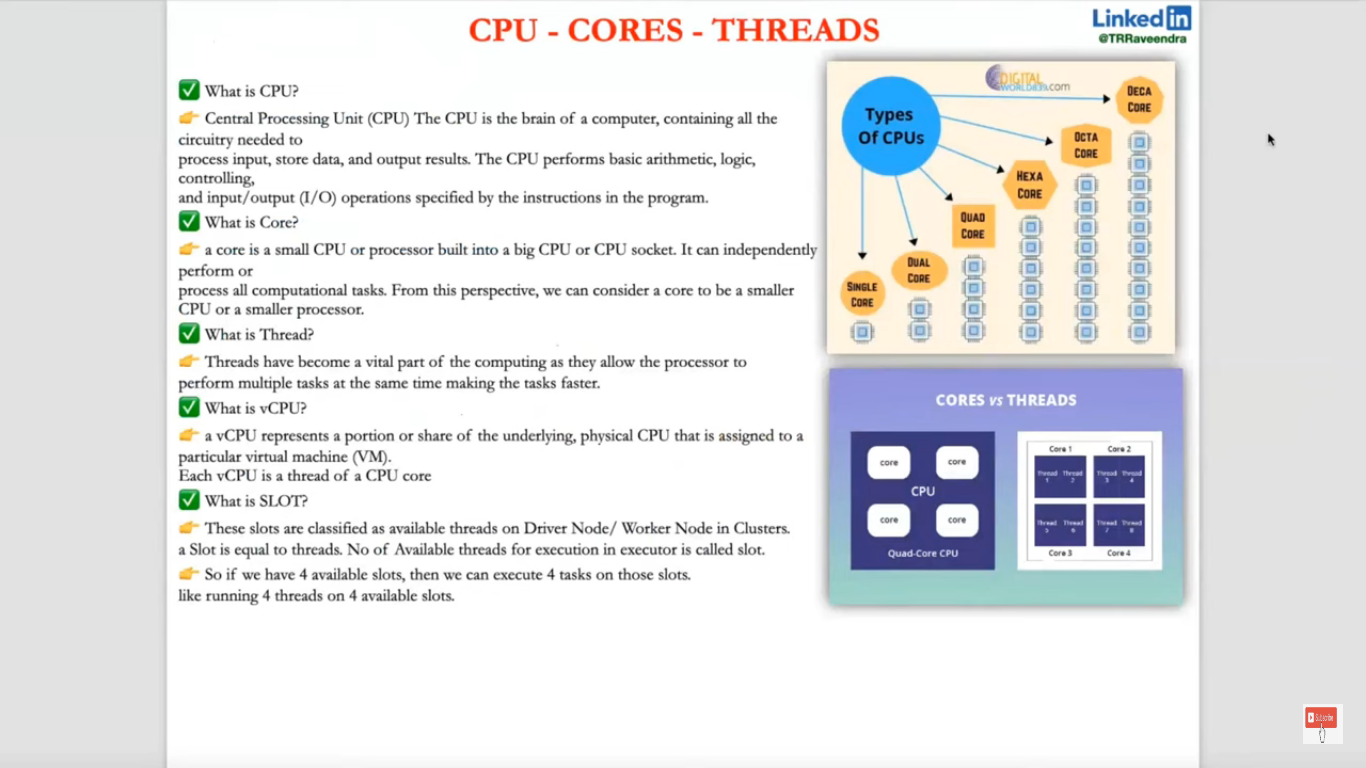

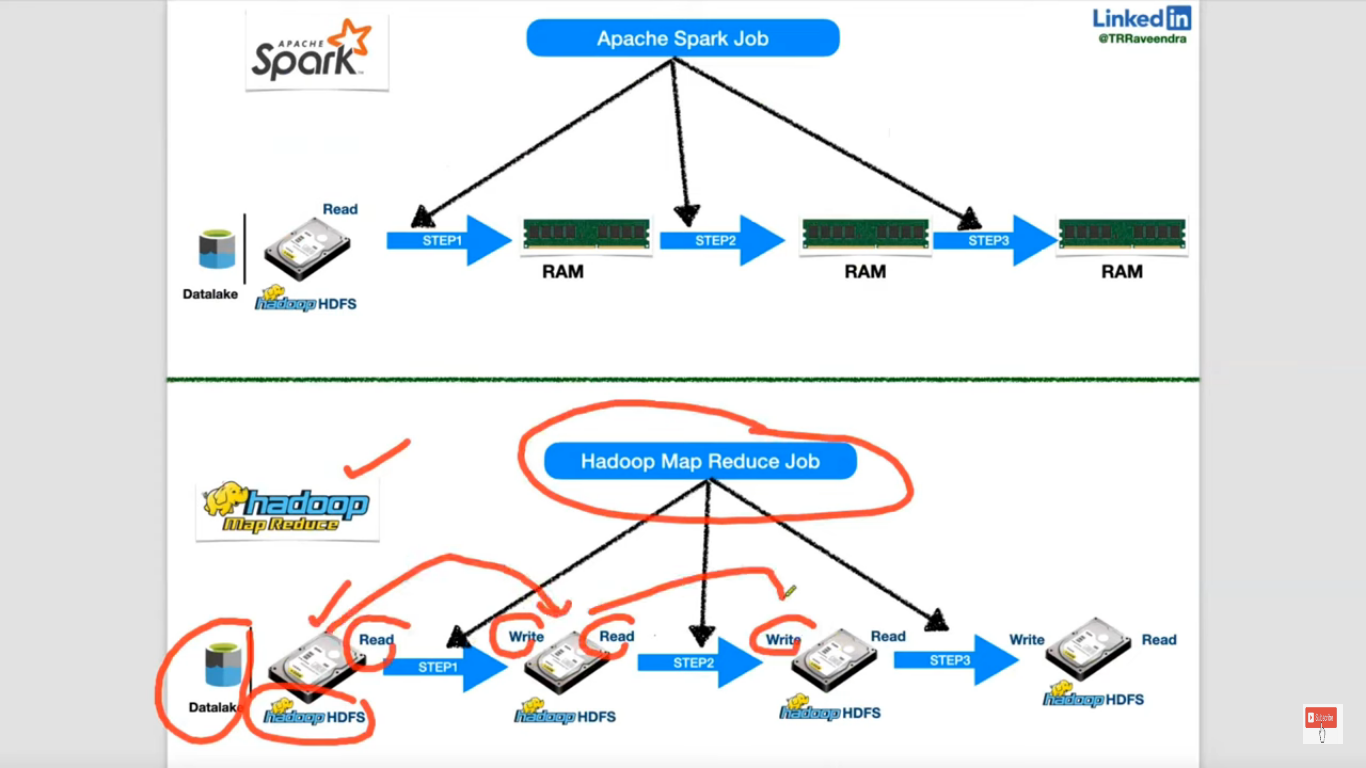

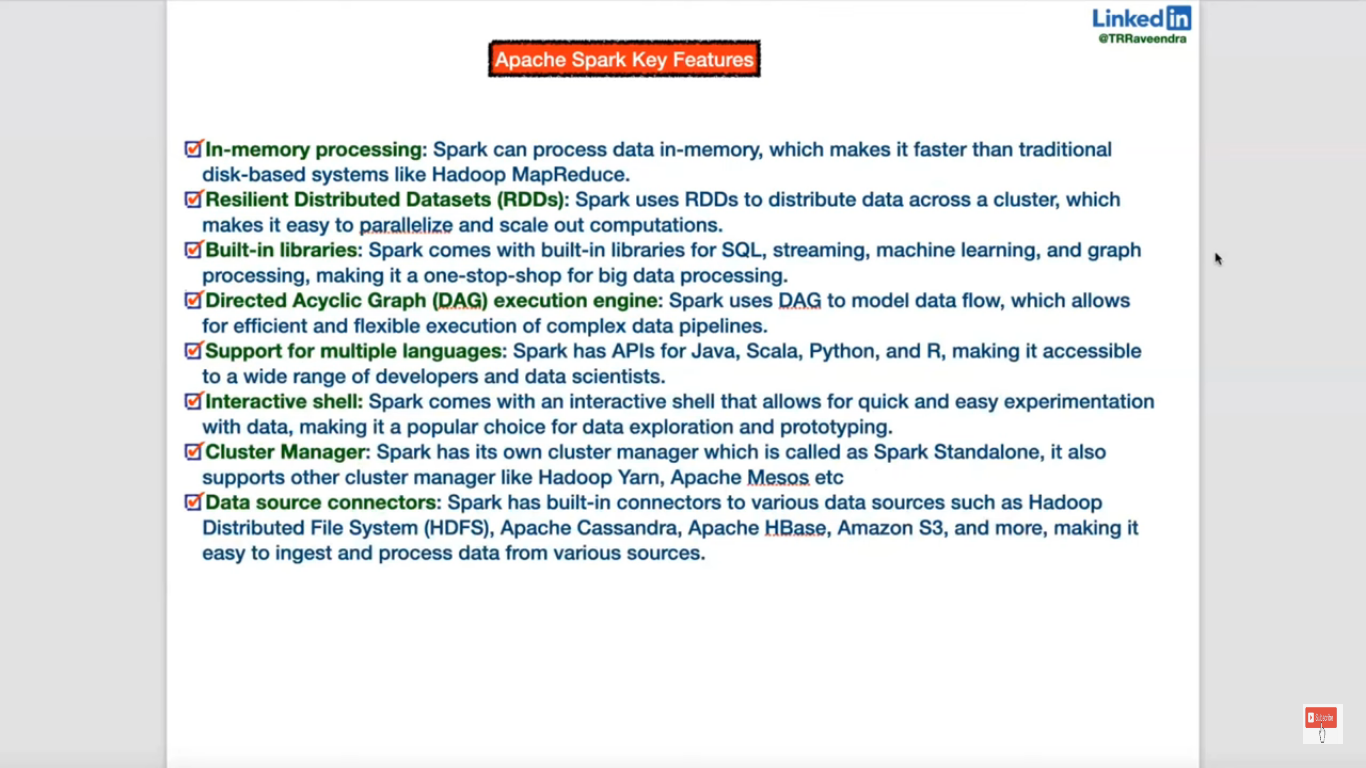

#### Single node cluster: Where driver node, executor node are in same cluster
#### Multi node cluster: where driver node, executor node are in seperate cluster

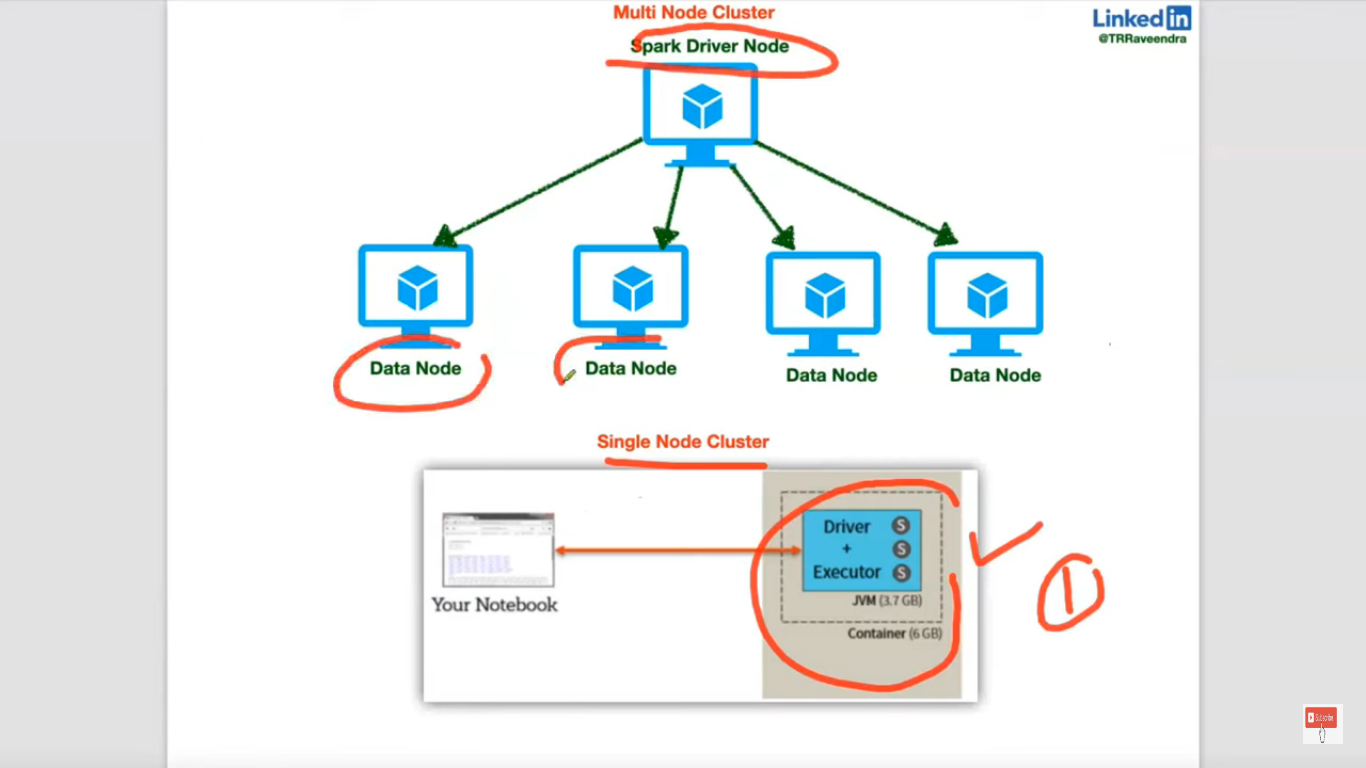

## Spark architecture

#### From Spark 2.0 onwards, SparkSession is responsible for all contexts avaiable(Spark context, Hive context, sql context, streaming context). We no need to have multiple contexts for multiple services. 

#### SparkSession is having authentication + autorization access.

#### that means by default Spark is having sc also.


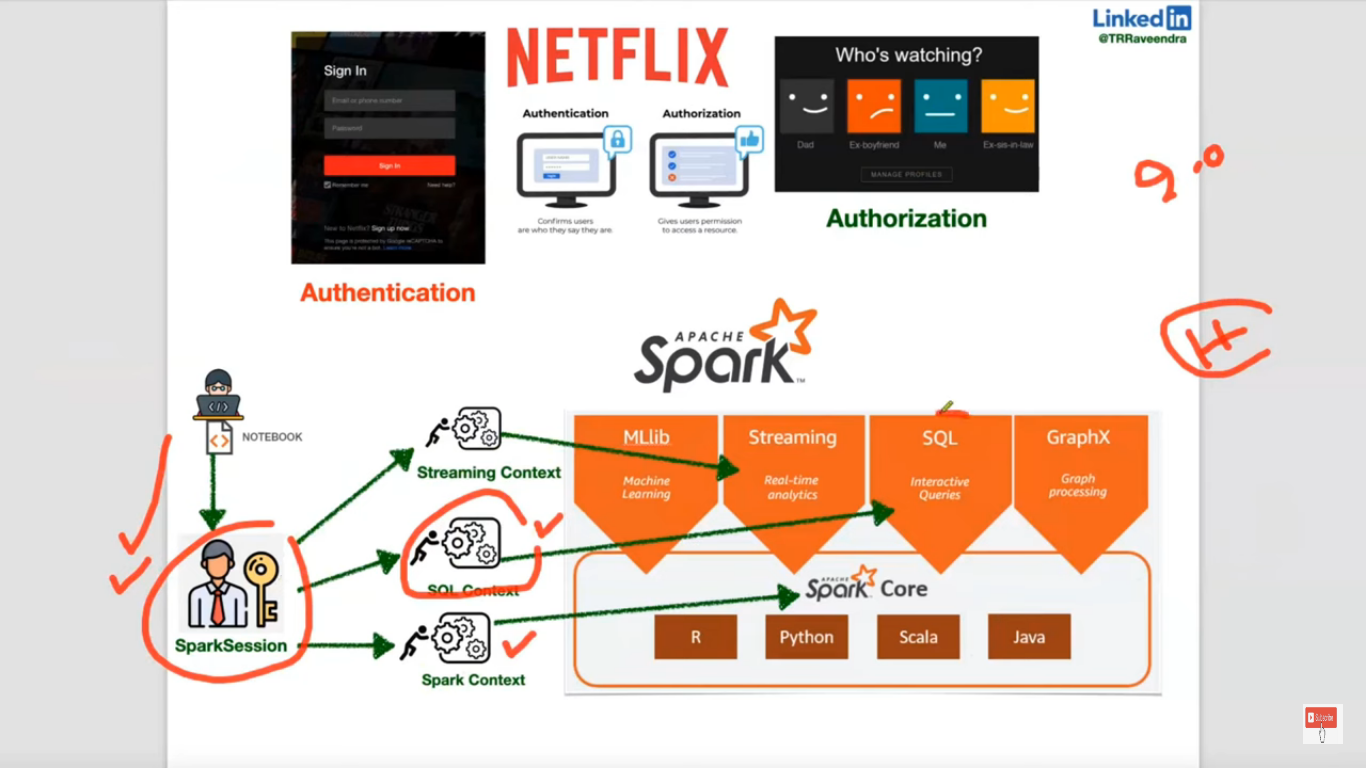


## Different ways to create rdd in spark

### Just like we have tables in Database, we have RDD, Dataframe in Spark.

In [11]:
## parallelize()


## Type-1:  sparkcontext is having parallelize() function so we can directly use with sc.
rdd1 = sc.parallelize([1,2,3,4,5,6])
print("type(rdd1) = ", type(rdd1))



## Type-2: By using SparkSession if we want to use then sc will not work we have to use fullname called sparkContext than sc.
rdd2 = spark.sparkContext.parallelize([2,3,4,5,6,7])
print("type(rdd2) = ", type(rdd2))

type(rdd1) =  <class 'pyspark.rdd.RDD'>
type(rdd2) =  <class 'pyspark.rdd.RDD'>


#### RDD, Dataframes are having 2 operations(Transformations, Actions.)
#### - Transformations: (DML, DDL): changing metadata or Data defination, Data Manupulations comes under this. RDD's are created on top of RDD's and return new RDD. These are lazy evaluated(until actions trigged then only execution process starts.)

#### - Actions: (DRL): Data Retraval language. Printing data or collecting data, saving data comes under this. Dag will be created with given transformations and actual execution starts with actions and results will be printed or saved.

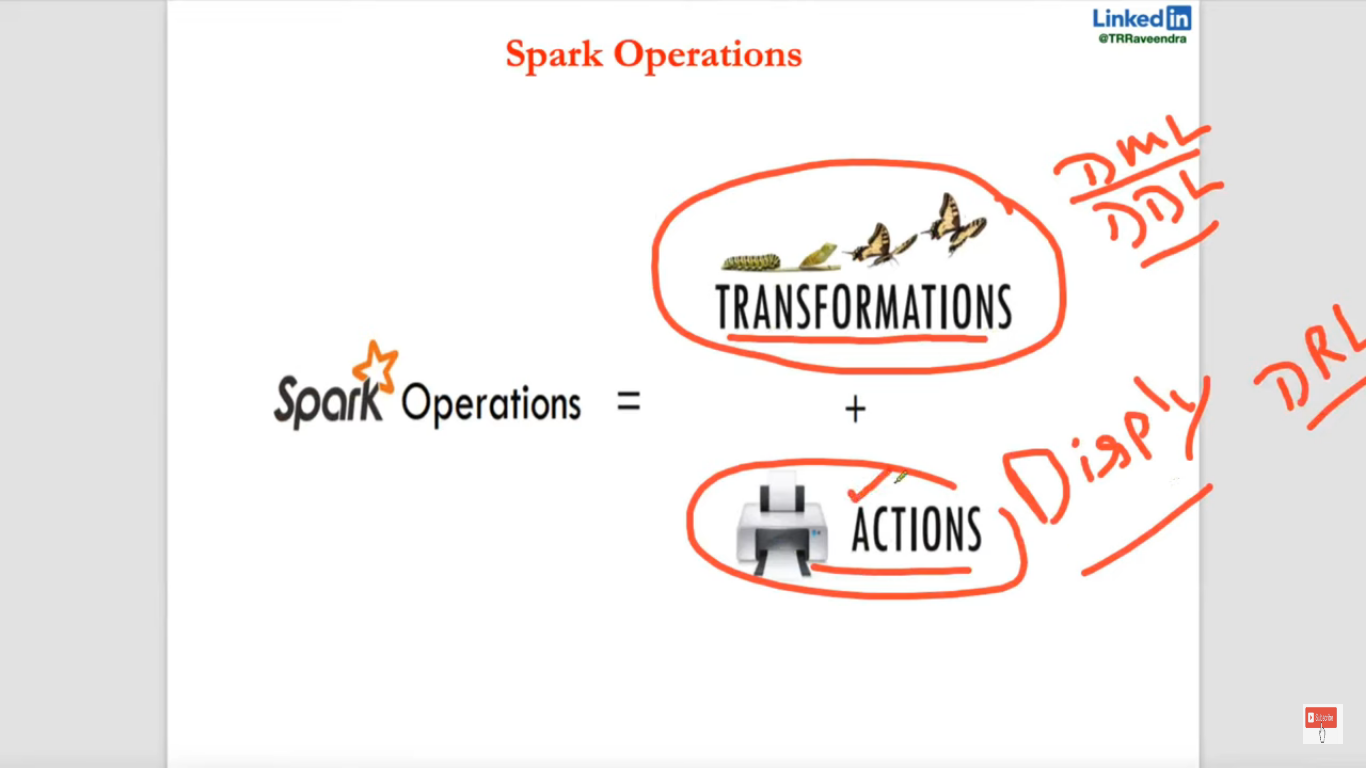

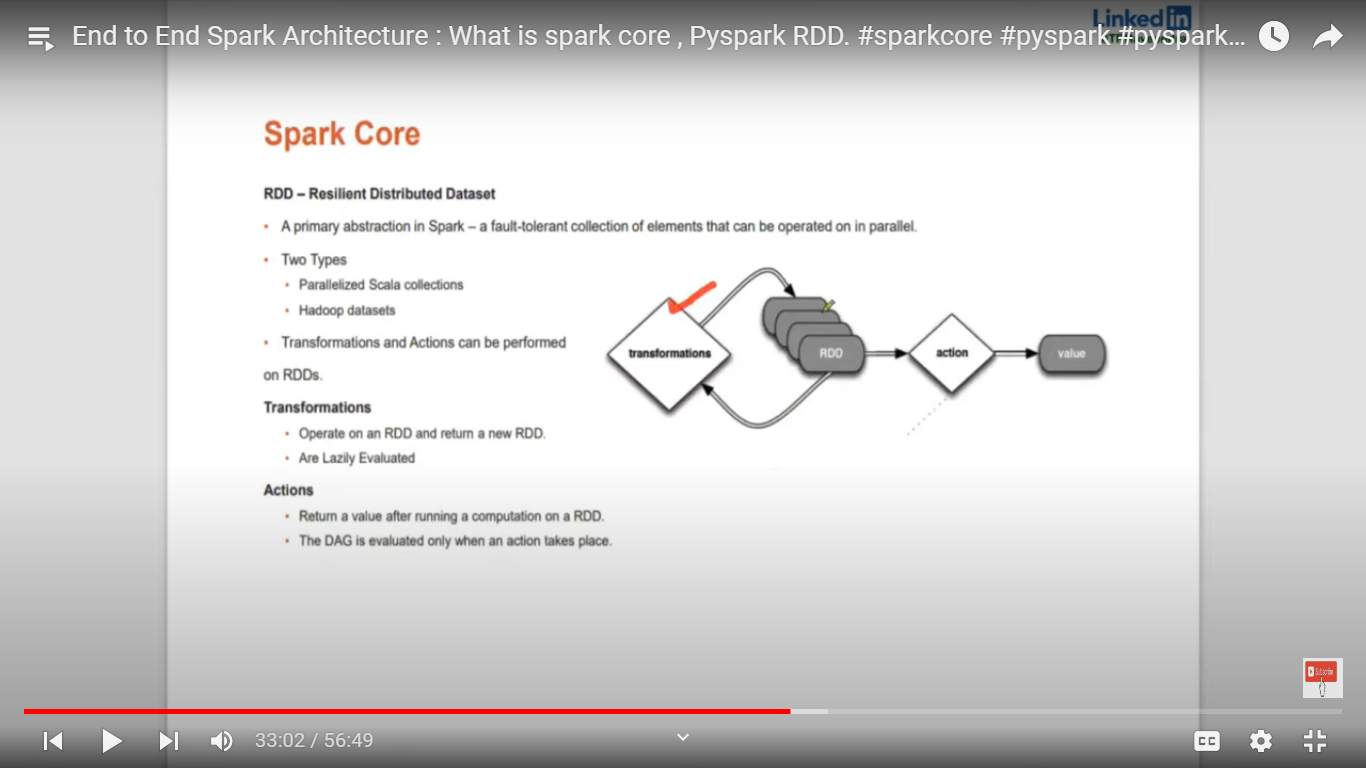

# How to change partitions of rdd

### coalesce() -> narrow transformation -> recommended

### repartition()  -> wide transformation -> not recommended

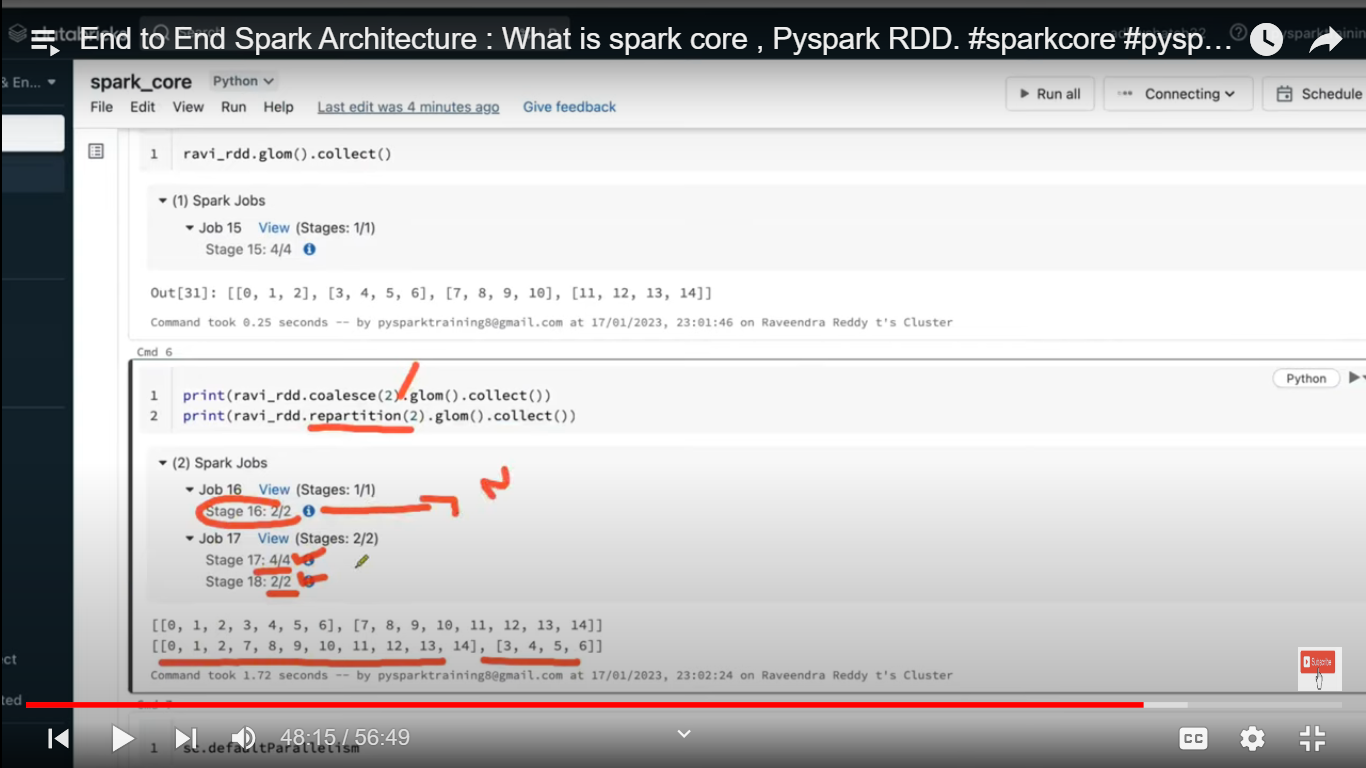

In [12]:
#create rdd using parallilize()
rdd3 = spark.sparkContext.parallelize([1,2,3,4,5,6,7,8,9,10,11,12,13,14])


#check data by partition using glom()
rdd3.glom().collect()


[[1, 2], [3, 4], [5, 6], [7, 8]]

In [14]:
#change the default partitions from 4 to 6
rdd4 = spark.sparkContext.parallelize([1,2,3,4,5,6,7,8,9,10,11,12,13,14], 6)


#check data by partition using glom()
rdd4.glom().collect()

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12, 13, 14]]

#### coalesce() -> narrow transformation -> recommended

#### repartition()  -> wide transformation -> not recommended

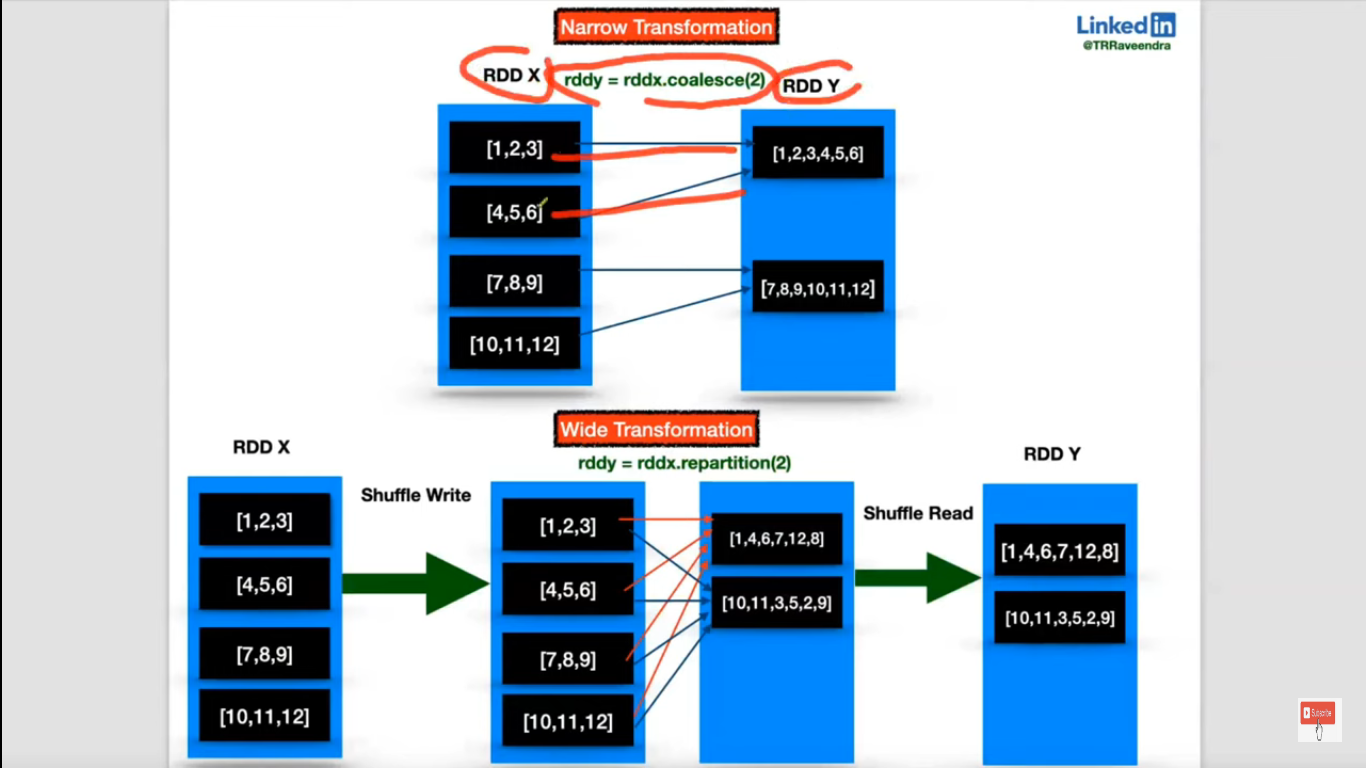


In [7]:
# Now change the partitions using coalesce(), repartition()
# coalesce() --> simple or narrow transformation doestn't required any shuffels
# repartition() --> complext or wide transformation required lots of shuffeling data

rdd4 = spark.sparkContext.parallelize([1,2,3,4,5,6,7,8,9,10,11,12])     #default 4 partitions

print("RDD:                \n", rdd4.glom().collect())
print("\n\n coalesce():    \n", rdd4.coalesce(2).glom().collect())
print("\n\n repartition(): \n", rdd4.repartition(2).glom().collect())

RDD:                
 [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


 coalesce():    
 [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12]]


 repartition(): 
 [[1, 2, 3, 7, 8, 9, 10, 11, 12], [4, 5, 6]]


In [9]:
"""
coalesce() --> we cannot increase the no..of partitions morethan given partitions of rdd.
                (rdd4 was having 4, so we cannot go morethan 4 partitions.)
                Ex: below we are increasing partitions from 4 to 6 but coalesce() willnot support and will have only 4.



repartition() --> we can increase the partitions of rdd morethan what given to rdd.
                    Here we've increase 4 to 6 and it is possible to do with repartition().


"""
rdd4 = spark.sparkContext.parallelize([1,2,3,4,5,6,7,8,9,10,11,12])     #default 4 partitions

print("RDD:                \n", rdd4.glom().collect())
print("\n\n coalesce():    \n", rdd4.coalesce(6).glom().collect())
print("\n\n repartition(): \n", rdd4.repartition(6).glom().collect())

RDD:                
 [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


 coalesce():    
 [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


 repartition(): 
 [[], [1, 2, 3], [10, 11, 12], [], [7, 8, 9], [4, 5, 6]]


### We still can increase partition using coalesce() by passing second arggument as True. this means shuffle is set to True and coalesce() acts as repartition(). 

### But this is limited to only RDD level butnot Dataframe level. Since 3,4 years nobody using RDD's for data analysis purposes and everybody using Dataframes only.

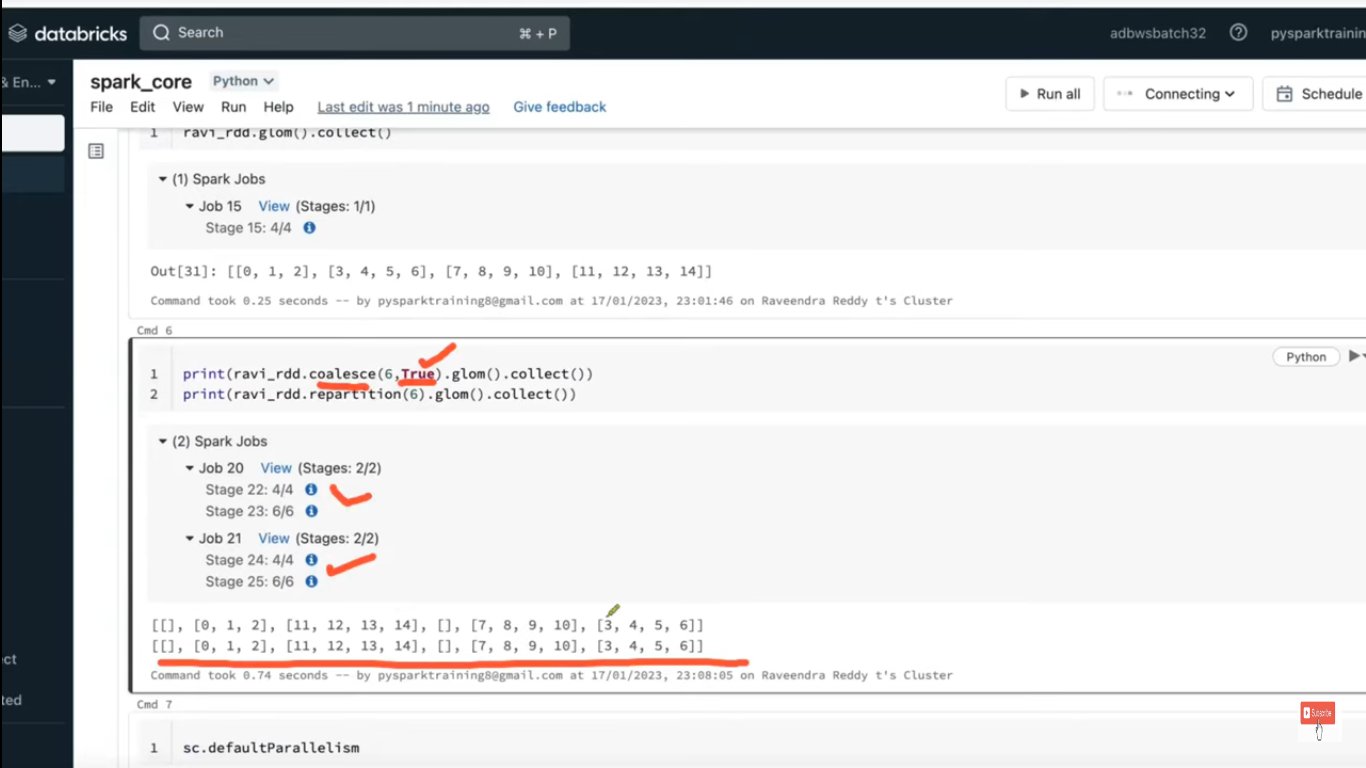

In [10]:
"""
We still can increase partition using coalesce() by passing second arggument as True. this means shuffle is set to True and coalesce() acts as repartition().
But this is limited to only RDD level butnot Dataframe level. Since 3,4 years nobody using RDD's for data analysis purposes and everybody using Dataframes only.¶
"""
print("RDD:                \n", rdd4.glom().collect())
print("\n\n coalesce():    \n", rdd4.coalesce(6, True).glom().collect())
print("\n\n repartition(): \n", rdd4.repartition(6).glom().collect())

RDD:                
 [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


 coalesce():    
 [[], [1, 2, 3], [10, 11, 12], [], [7, 8, 9], [4, 5, 6]]


 repartition(): 
 [[], [1, 2, 3], [10, 11, 12], [], [7, 8, 9], [4, 5, 6]]


# End of Spark CORE:

# _______________________________________________________________________________________________________________________________________

# Spark coding examples Start: 06June2023

## 1). Word count program:
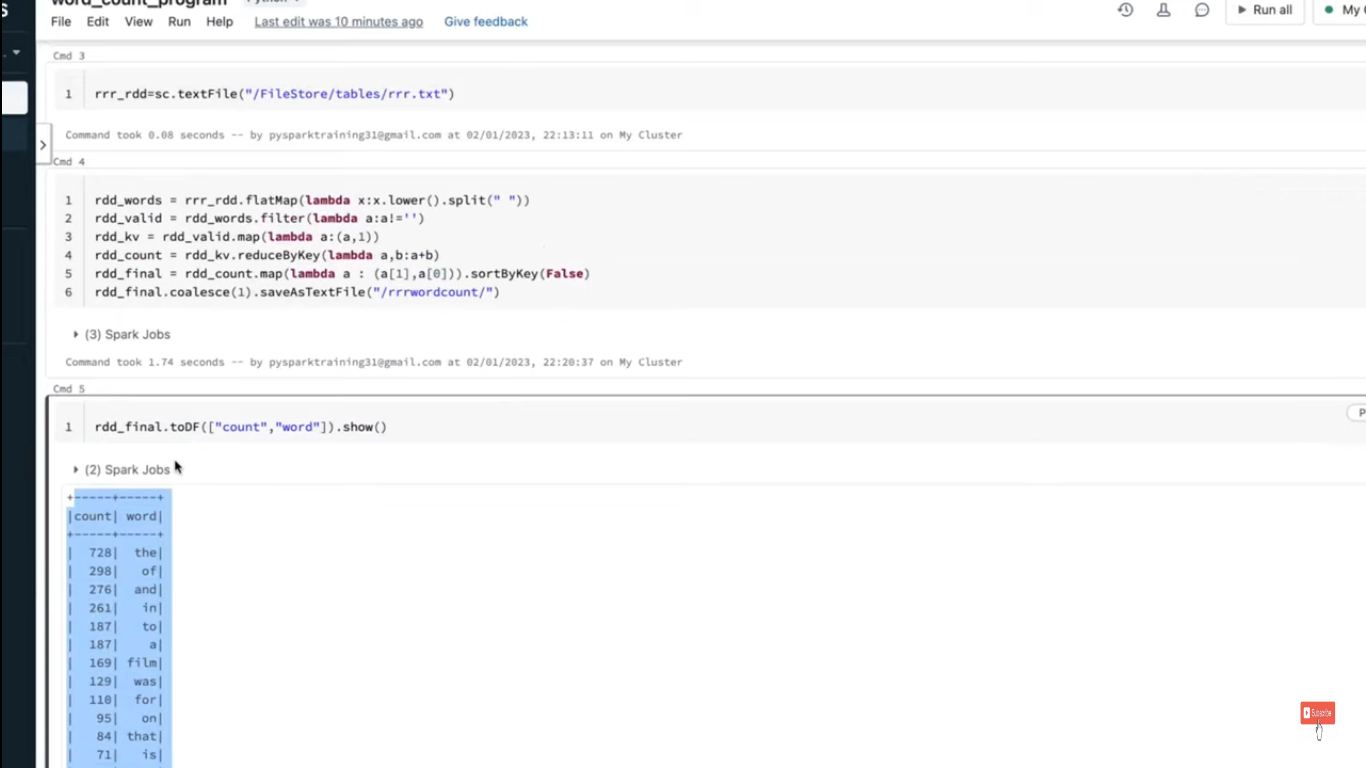

In [40]:
# 1.Read text file
rdd1_read = sc.textFile("rrr_story.txt")  


# 2.Flatten the data means, remvoing nested lines to single lines and split each word with space
rdd2_flat = rdd1_read.flatMap(lambda a: a.lower().split(" "))


# 3. remove the spaces in data:
rdd3_filter = rdd2_flat.filter(lambda b: b!="")


# 4. assing key, value for each word with map()
rdd4_map = rdd3_filter.map(lambda c: (c, 1))


# 5. sum by the key value and sum assinged to value using reduceByKey()
rdd5_reduce = rdd4_map.reduceByKey(lambda a,b: a + b)


# 6. Sort the data based on sum of keys and swap key, value as value, key. Descending order with False argument. 
#    First we are swap key, value to value, key and then sortByKey() to descending order.
rdd6_sort_final = rdd5_reduce.map(lambda d: (d[1], d[0])).sortByKey(False)


# 7. Save the entire results with single partition using coalesce()
rdd6_sort_final.coalesce(1).saveAsTextFile("/rrr_output_rdd/")


#8. Save rdd to Dataframe and print
rdd6_sort_final.toDF(["Count", "Word"]).show()

+-----+------+
|Count|  Word|
+-----+------+
|   49|   the|
|   23|   and|
|   20|    to|
|   17|  film|
|   13|    of|
|   11|    in|
|   10|     a|
|   10|indian|
|    8|   rrr|
|    8| bheem|
|    8|    by|
|    8|    it|
|    7|   was|
|    7|  raju|
|    6|    v.|
|    6|    an|
|    6|    as|
|    6|  best|
|    6|   for|
|    6| first|
+-----+------+
only showing top 20 rows



In [41]:
%pwd

'C:\\Users\\R101100\\Desktop\\Git_Practice\\0.Pyspark_May2023'

#### Outputs for each line in above code

In [16]:
rdd1_read.collect()

['"RRR" redirects here. For other uses, see RRR (disambiguation).',
 'RRR',
 'RRR Poster.jpg',
 'Theatrical release poster',
 'Directed by\tS. S. Rajamouli',
 'Screenplay by\tS. S. Rajamouli',
 'Dialogues by\t',
 'Sai Madhav Burra',
 'Rama Rajamouli (additional)',
 'Story by\tV. Vijayendra Prasad',
 'Produced by\tD. V. V. Danayya',
 'Starring\t',
 'N. T. Rama Rao Jr.',
 'Ram Charan',
 'Ajay Devgn',
 'Alia Bhatt',
 'Shriya Saran',
 'Samuthirakani',
 'Ray Stevenson',
 'Alison Doody',
 'Olivia Morris',
 'Cinematography\tK. K. Senthil Kumar',
 'Edited by\tA. Sreekar Prasad',
 'Music by\tM. M. Keeravani',
 'Production',
 'company\t',
 'DVV Entertainment',
 'Distributed by\t',
 'Pen Studios (North India)',
 'Lyca Productions (Tamil Nadu)',
 'KVN Productions (Karnataka)',
 'HR Pictures (Kerala)',
 'Release date\t',
 '25 March 2022',
 'Running time\t182 minutes[1][2]',
 'Country\tIndia',
 'Language\tTelugu',
 'Budget\t₹550 crore[3]',
 'Box office\test. ₹1,200–1,258 crore[4][5]',
 'RRR[a] is a 

In [15]:
rdd2_flat.collect()

['"rrr"',
 'redirects',
 'here.',
 'for',
 'other',
 'uses,',
 'see',
 'rrr',
 '(disambiguation).',
 'rrr',
 'rrr',
 'poster.jpg',
 'theatrical',
 'release',
 'poster',
 'directed',
 'by\ts.',
 's.',
 'rajamouli',
 'screenplay',
 'by\ts.',
 's.',
 'rajamouli',
 'dialogues',
 'by\t',
 'sai',
 'madhav',
 'burra',
 'rama',
 'rajamouli',
 '(additional)',
 'story',
 'by\tv.',
 'vijayendra',
 'prasad',
 'produced',
 'by\td.',
 'v.',
 'v.',
 'danayya',
 'starring\t',
 'n.',
 't.',
 'rama',
 'rao',
 'jr.',
 'ram',
 'charan',
 'ajay',
 'devgn',
 'alia',
 'bhatt',
 'shriya',
 'saran',
 'samuthirakani',
 'ray',
 'stevenson',
 'alison',
 'doody',
 'olivia',
 'morris',
 'cinematography\tk.',
 'k.',
 'senthil',
 'kumar',
 'edited',
 'by\ta.',
 'sreekar',
 'prasad',
 'music',
 'by\tm.',
 'm.',
 'keeravani',
 'production',
 'company\t',
 'dvv',
 'entertainment',
 'distributed',
 'by\t',
 'pen',
 'studios',
 '(north',
 'india)',
 'lyca',
 'productions',
 '(tamil',
 'nadu)',
 'kvn',
 'productions',
 '(k

In [18]:
rdd3_filter.collect()

['"rrr"',
 'redirects',
 'here.',
 'for',
 'other',
 'uses,',
 'see',
 'rrr',
 '(disambiguation).',
 'rrr',
 'rrr',
 'poster.jpg',
 'theatrical',
 'release',
 'poster',
 'directed',
 'by\ts.',
 's.',
 'rajamouli',
 'screenplay',
 'by\ts.',
 's.',
 'rajamouli',
 'dialogues',
 'by\t',
 'sai',
 'madhav',
 'burra',
 'rama',
 'rajamouli',
 '(additional)',
 'story',
 'by\tv.',
 'vijayendra',
 'prasad',
 'produced',
 'by\td.',
 'v.',
 'v.',
 'danayya',
 'starring\t',
 'n.',
 't.',
 'rama',
 'rao',
 'jr.',
 'ram',
 'charan',
 'ajay',
 'devgn',
 'alia',
 'bhatt',
 'shriya',
 'saran',
 'samuthirakani',
 'ray',
 'stevenson',
 'alison',
 'doody',
 'olivia',
 'morris',
 'cinematography\tk.',
 'k.',
 'senthil',
 'kumar',
 'edited',
 'by\ta.',
 'sreekar',
 'prasad',
 'music',
 'by\tm.',
 'm.',
 'keeravani',
 'production',
 'company\t',
 'dvv',
 'entertainment',
 'distributed',
 'by\t',
 'pen',
 'studios',
 '(north',
 'india)',
 'lyca',
 'productions',
 '(tamil',
 'nadu)',
 'kvn',
 'productions',
 '(k

In [20]:
rdd4_map.collect()

[('"rrr"', 1),
 ('redirects', 1),
 ('here.', 1),
 ('for', 1),
 ('other', 1),
 ('uses,', 1),
 ('see', 1),
 ('rrr', 1),
 ('(disambiguation).', 1),
 ('rrr', 1),
 ('rrr', 1),
 ('poster.jpg', 1),
 ('theatrical', 1),
 ('release', 1),
 ('poster', 1),
 ('directed', 1),
 ('by\ts.', 1),
 ('s.', 1),
 ('rajamouli', 1),
 ('screenplay', 1),
 ('by\ts.', 1),
 ('s.', 1),
 ('rajamouli', 1),
 ('dialogues', 1),
 ('by\t', 1),
 ('sai', 1),
 ('madhav', 1),
 ('burra', 1),
 ('rama', 1),
 ('rajamouli', 1),
 ('(additional)', 1),
 ('story', 1),
 ('by\tv.', 1),
 ('vijayendra', 1),
 ('prasad', 1),
 ('produced', 1),
 ('by\td.', 1),
 ('v.', 1),
 ('v.', 1),
 ('danayya', 1),
 ('starring\t', 1),
 ('n.', 1),
 ('t.', 1),
 ('rama', 1),
 ('rao', 1),
 ('jr.', 1),
 ('ram', 1),
 ('charan', 1),
 ('ajay', 1),
 ('devgn', 1),
 ('alia', 1),
 ('bhatt', 1),
 ('shriya', 1),
 ('saran', 1),
 ('samuthirakani', 1),
 ('ray', 1),
 ('stevenson', 1),
 ('alison', 1),
 ('doody', 1),
 ('olivia', 1),
 ('morris', 1),
 ('cinematography\tk.', 1),
 (

In [22]:
rdd5_reduce.collect()

[('"rrr"', 1),
 ('redirects', 1),
 ('here.', 1),
 ('other', 1),
 ('rrr', 8),
 ('poster.jpg', 1),
 ('dialogues', 1),
 ('by\t', 2),
 ('sai', 1),
 ('madhav', 1),
 ('burra', 1),
 ('rama', 5),
 ('(additional)', 1),
 ('story', 1),
 ('prasad', 2),
 ('produced', 2),
 ('by\td.', 1),
 ('v.', 6),
 ('starring\t', 1),
 ('n.', 2),
 ('jr.', 1),
 ('charan', 1),
 ('devgn', 1),
 ('bhatt', 1),
 ('shriya', 2),
 ('stevenson', 1),
 ('alison', 2),
 ('doody', 1),
 ('olivia', 2),
 ('cinematography\tk.', 1),
 ('edited', 1),
 ('by\ta.', 1),
 ('sreekar', 2),
 ('music', 1),
 ('by\tm.', 1),
 ('production', 3),
 ('company\t', 1),
 ('studios', 1),
 ('(north', 1),
 ('lyca', 1),
 ('(tamil', 1),
 ('kvn', 1),
 ('hr', 1),
 ('pictures', 1),
 ('date\t', 1),
 ('language\ttelugu', 1),
 ('crore[3]', 1),
 ('crore[4][5]', 1),
 ('is', 5),
 ('epic', 1),
 ('action', 2),
 ('drama', 1),
 ('co-wrote', 1),
 ('prasad.', 2),
 ('was', 7),
 ('d.', 1),
 ('of', 13),
 ('jr.,', 1),
 ('saran,', 1),
 ('samuthirakani,', 1),
 ('doody,', 1),
 ('mor

In [28]:
rdd6_sort.collect()

[(49, 'the'),
 (23, 'and'),
 (20, 'to'),
 (17, 'film'),
 (13, 'of'),
 (11, 'in'),
 (10, 'a'),
 (10, 'indian'),
 (8, 'rrr'),
 (8, 'bheem'),
 (8, 'by'),
 (8, 'it'),
 (7, 'was'),
 (7, 'raju'),
 (6, 'v.'),
 (6, 'an'),
 (6, 'as'),
 (6, 'best'),
 (6, 'for'),
 (6, 'first'),
 (5, 'rama'),
 (5, 'is'),
 (5, 'crore'),
 (5, 'song'),
 (4, 's.'),
 (4, 'rajamouli'),
 (4, 'with'),
 (4, 'on'),
 (4, 'film,'),
 (4, 'from'),
 (3, 'production'),
 (3, 'million)'),
 (3, 'making'),
 (3, 'language'),
 (3, 'at'),
 (3, 'his'),
 (3, "bheem's"),
 (3, 'release'),
 (3, 'k.'),
 (3, 'm.'),
 (3, 'march'),
 (3, 'their'),
 (3, 'they'),
 (3, 'highest-grossing'),
 (3, 'won'),
 (3, "scott's"),
 (2, 'by\t'),
 (2, 'prasad'),
 (2, 'produced'),
 (2, 'n.'),
 (2, 'shriya'),
 (2, 'alison'),
 (2, 'olivia'),
 (2, 'sreekar'),
 (2, 'action'),
 (2, 'prasad.'),
 (2, 'friendship,'),
 (2, 'delays'),
 (2, 'filmed'),
 (2, "film's"),
 (2, 'several'),
 (2, 'third'),
 (2, 'telugu'),
 (2, 'only'),
 (2, '"naatu'),
 (2, 'award'),
 (2, 'win'),
 (2

In [36]:
#bydefault textfile will have only 2 partitions.
rdd6_sort.glom().collect()

[[(49, 'the'),
  (23, 'and'),
  (20, 'to'),
  (17, 'film'),
  (13, 'of'),
  (11, 'in'),
  (10, 'a'),
  (10, 'indian'),
  (8, 'rrr'),
  (8, 'bheem'),
  (8, 'by'),
  (8, 'it'),
  (7, 'was'),
  (7, 'raju'),
  (6, 'v.'),
  (6, 'an'),
  (6, 'as'),
  (6, 'best'),
  (6, 'for'),
  (6, 'first'),
  (5, 'rama'),
  (5, 'is'),
  (5, 'crore'),
  (5, 'song'),
  (4, 's.'),
  (4, 'rajamouli'),
  (4, 'with'),
  (4, 'on'),
  (4, 'film,'),
  (4, 'from'),
  (3, 'production'),
  (3, 'million)'),
  (3, 'making'),
  (3, 'language'),
  (3, 'at'),
  (3, 'his'),
  (3, "bheem's"),
  (3, 'release'),
  (3, 'k.'),
  (3, 'm.'),
  (3, 'march'),
  (3, 'their'),
  (3, 'they'),
  (3, 'highest-grossing'),
  (3, 'won'),
  (3, "scott's"),
  (2, 'by\t'),
  (2, 'prasad'),
  (2, 'produced'),
  (2, 'n.'),
  (2, 'shriya'),
  (2, 'alison'),
  (2, 'olivia'),
  (2, 'sreekar'),
  (2, 'action'),
  (2, 'prasad.'),
  (2, 'friendship,'),
  (2, 'delays'),
  (2, 'filmed'),
  (2, "film's"),
  (2, 'several'),
  (2, 'third'),
  (2, 'telugu')

In [42]:
type(rdd6_sort_final)

pyspark.rdd.PipelinedRDD